In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import randint

### Data Download

In [2]:
xlsx= pd.ExcelFile("/content/KPMG_VI_Cleaned.xlsx")

In [3]:
xlsx.sheet_names

['Transactions',
 'NewCustomerList',
 'CustomerDemographic',
 'CustomerAddress',
 'MVC',
 'MVC100',
 'MVC50',
 'MVC_Top']

In [4]:
df_t = pd.read_excel(xlsx, sheet_name="Transactions")
df_t.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,17.87,2012-12-02
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,2014-03-03


In [5]:
df_cd = pd.read_excel(xlsx, sheet_name="CustomerDemographic")
df_cd.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1.0,Laraine,Medendorp,Female,93.0,1953-10-12,68.378589,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2.0,Eli,Bockman,Male,81.0,1980-12-16,41.181329,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0


In [6]:
df_ca = pd.read_excel(xlsx, sheet_name="CustomerAddress")
df_ca.head(2)

,customer_id,address,postcode,state,country,property_valuation
0,1.0,060 Morning Avenue,2016.0,NSW,Australia,10.0
1,2.0,6 Meadow Vale Court,2153.0,NSW,Australia,10.0


In [7]:
df_nc = pd.read_excel(xlsx, sheet_name="NewCustomerList")
df_nc.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  """Entry point for launching an IPython kernel.


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,64.637933,General Manager,Manufacturing,Mass Customer,N,Yes,14.0,45 Shopko Center,4500.0,QLD,Australia,6.0,1.09,1.3625,1.703125,1.447656,1,1.0,1.71875
1,Morly,Genery,Male,69,1970-03-22,51.936564,Structural Engineer,Property,Mass Customer,N,No,16.0,14 Mccormick Park,2113.0,NSW,Australia,11.0,0.50,0.5000,0.625000,0.531250,1,1.0,1.71875


### Data Preparation

In [8]:
len(df_t.customer_id), len(df_cd.customer_id), len(df_ca.customer_id)

(19273, 3910, 3999)

In [9]:
df= df_t.merge(df_cd, on='customer_id')
df.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,17.87,2012-12-02,Kristos,Anthony,Male,19.0,1955-01-11,67.129274,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
1,11065,1,2950,2017-10-16,False,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,448.68,2003-02-07,Kristos,Anthony,Male,19.0,1955-01-11,67.129274,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
2,18923,62,2950,2017-04-26,False,Approved,Solex,Standard,medium,medium,478.16,298.72,179.44,2010-11-05,Kristos,Anthony,Male,19.0,1955-01-11,67.129274,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
3,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,2014-03-03,Lauree,O'Donnell,Female,89.0,1979-02-04,43.047083,Clinical Specialist,Health,Mass Customer,N,Yes,10.0
4,6862,4,3120,2017-10-05,False,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,451.65,2011-04-16,Lauree,O'Donnell,Female,89.0,1979-02-04,43.047083,Clinical Specialist,Health,Mass Customer,N,Yes,10.0


In [10]:
df= df.drop(['first_name','last_name'],axis=1)

In [11]:
df= df.merge(df_ca, on="customer_id")

### Data Exploration

##### Gender

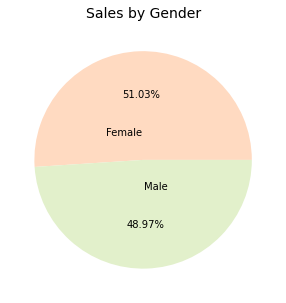

In [12]:
fig, ax = plt.subplots(figsize=(5,5))

table= df.pivot_table(index="gender",values="list_price", aggfunc=np.sum).reset_index()

plt.pie(table['list_price'], 
        labels=table['gender'],
        labeldistance=0.25, 
        autopct="%1.2f%%",
        colors=['#FFDAC1','#E2F0CB'])

plt.title("Sales by Gender", size=14)
plt.show()

##### Age

In [13]:
df['Age_Segment']= (df['Age'].astype(int)//10*10).astype(str)+"-"+(df['Age'].astype(int)//10*10+10).astype(str)

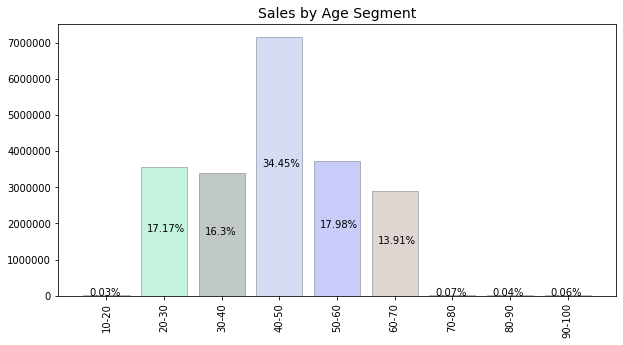

In [14]:
fig, ax = plt.subplots(figsize=(10,5))

table= df.pivot_table(index="Age_Segment",
                         values="list_price", 
                         aggfunc=np.sum).reset_index()

chart= plt.bar(x=table['Age_Segment'],
        height=table['list_price'],
        color = ['#%06X' % randint(0, 0xFFFFFF) for i in range(9)], 
        alpha=0.25, edgecolor = 'black')

i=0
for c in chart.patches:
    width, height = c.get_width(), c.get_height()
    x, y = c.get_xy()
    plt.text(x+0.1, y+height/2,
             str(round(table.list_price[i]/sum(table.list_price)*100, 2))+"%",
             size=10)
    i+=1

plt.xticks(rotation=90)
ax.ticklabel_format(style='plain', axis="y")
plt.title("Sales by Age Segment", size=14)
plt.show()

##### Industry

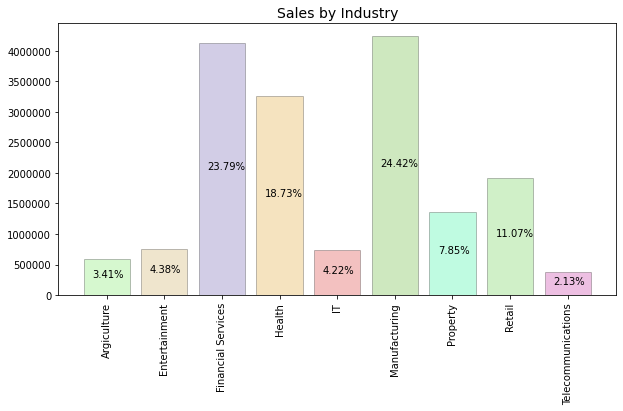

In [15]:
fig, ax = plt.subplots(figsize=(10,5))

table= df.pivot_table(index="job_industry_category",
                         values="list_price", 
                         aggfunc=np.sum).reset_index()

chart= plt.bar(x=table['job_industry_category'],
        height=table['list_price'],
        color = ['#%06X' % randint(0, 0xFFFFFF) for i in range(9)], 
        alpha=0.25, edgecolor = 'black')

i=0
for c in chart.patches:
    width, height = c.get_width(), c.get_height()
    x, y = c.get_xy()
    plt.text(x+0.15, y+height/2,
             str(round(table.list_price[i]/sum(table.list_price)*100, 2))+"%",
             size=10)
    i+=1

plt.xticks(rotation=90)
ax.ticklabel_format(style='plain', axis="y")
plt.title("Sales by Industry", size=14)
plt.show()

##### Wealth Segment

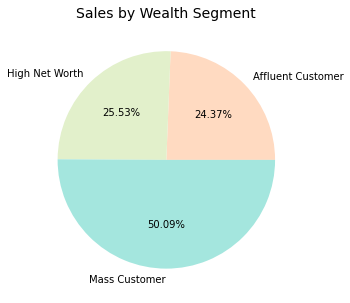

In [16]:
fig, ax = plt.subplots(figsize=(5,5))

table= df.pivot_table(index="wealth_segment",values="list_price", aggfunc=np.sum).reset_index()

plt.pie(table['list_price'], 
        labels=table['wealth_segment'],
        labeldistance=1.1, 
        autopct="%1.2f%%",
        colors=['#FFDAC1','#E2F0CB','#a4e6de'])

plt.title("Sales by Wealth Segment", size=14)
plt.show()

##### Car Ownership and Property Value

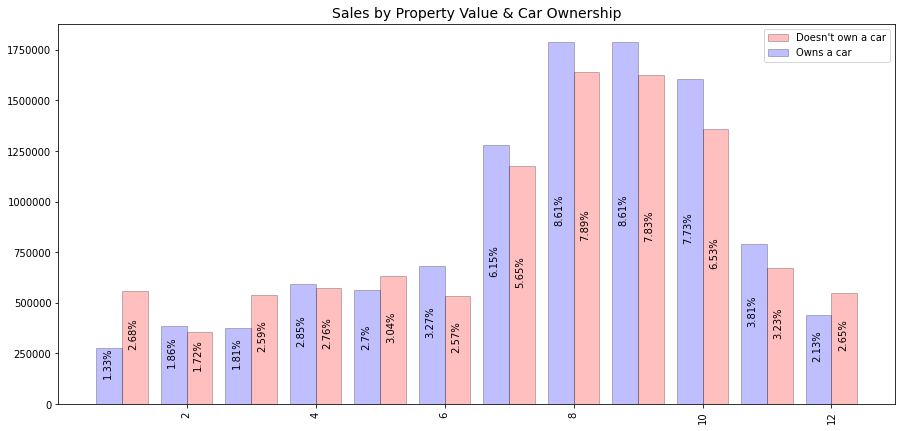

In [17]:
fig, ax = plt.subplots(figsize=(15,7))

table= df.pivot_table(index=["property_valuation","owns_car"],
                         values="list_price", 
                         aggfunc=np.sum).reset_index()

chart= plt.bar(x=table['property_valuation'][table['owns_car']=="No"]+0.2,
        height=table['list_price'][table['owns_car']=="No"],
        color = "red", label= "Doesn't own a car",
        alpha=0.25, edgecolor = 'black', width=0.4)


i=0
for c in chart.patches:
    width, height = c.get_width(), c.get_height()
    x, y = c.get_xy()
    plt.text(x+0.1, y+height/2,
             str(round(table.list_price[i]/sum(table.list_price)*100, 2))+"%",
             size=10, rotation=90)
    i+=2

chart= plt.bar(x=table['property_valuation'][table['owns_car']=="Yes"]-0.2,
        height=table['list_price'][table['owns_car']=="Yes"],
        color = "blue", label="Owns a car",
        alpha=0.25, edgecolor = 'black', width=0.4)

i=1
for c in chart.patches:
    width, height = c.get_width(), c.get_height()
    x, y = c.get_xy()
    plt.text(x+0.1, y+height/2,
             str(round(table.list_price[i]/sum(table.list_price)*100, 2))+"%",
             size=10, rotation=90)
    i+=2

plt.xticks(rotation=90)
plt.legend()
ax.ticklabel_format(style='plain', axis="y")
plt.title("Sales by Property Value & Car Ownership", size=14)
plt.show()

##### State

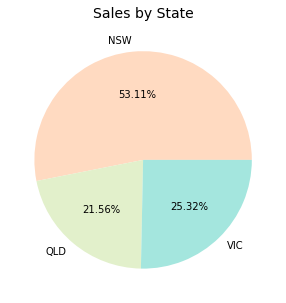

In [18]:
fig, ax = plt.subplots(figsize=(5,5))

table= df.pivot_table(index="state",values="list_price", aggfunc=np.sum).reset_index()

plt.pie(table['list_price'], 
        labels=table['state'],
        labeldistance=1.1, 
        autopct="%1.2f%%",
        colors=['#FFDAC1','#E2F0CB','#a4e6de'])

plt.title("Sales by State", size=14)
plt.show()

### RFM

In [19]:
df['recency']= (df['transaction_date'].max()- df.transaction_date).dt.days

In [20]:
df_rfm=df.pivot_table(index="customer_id", 
                      values="recency", 
                      aggfunc="min").reset_index()

In [21]:
df_rfm['frequency']= df.pivot_table(index="customer_id", 
                                    values="past_3_years_bike_related_purchases", 
                                    aggfunc="mean").reset_index()['past_3_years_bike_related_purchases']

In [22]:
df_rfm['monetary']=df.pivot_table(index="customer_id", 
                                  values="list_price", 
                                  aggfunc="sum").reset_index()['list_price']

In [23]:
df_rfm['r_score'] = pd.qcut(df_rfm['recency'], 4, ['4','3','2','1'])
df_rfm['f_score'] = pd.qcut(df_rfm['frequency'], 4, ['1','2','3','4'])
df_rfm['m_score'] = pd.qcut(df_rfm['monetary'], 4, ['1','2','3','4'])

In [24]:
df_rfm['rfm_class'] = df_rfm.r_score.astype(str)+ df_rfm.f_score.astype(str) + df_rfm.m_score.astype(str)

df_rfm['rfm_score'] = df_rfm[['r_score','f_score','m_score']].astype(int).sum(axis=1)

In [25]:
def rfm_label(x):
  if x >= 9:
    return 'Can\'t Loose Them'
  elif ((x >= 8) and (x < 9)):
    return 'Champions'
  elif ((x >= 7) and (x < 8)):
    return 'Loyal'
  elif ((x >= 6) and (x < 7)):
    return 'Potential'
  elif ((x>= 5) and (x < 6)):
    return 'Promising'
  elif ((x >= 4) and (x < 5)):
    return 'Needs Attention'
  else:
    return 'Require Activation'

df_rfm['rfm_label']=df_rfm.rfm_score.apply(rfm_label)
df_rfm.head()

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_class,rfm_score,rfm_label
0,1,7,93.0,9084.45,4,4,4,444,12,Can't Loose Them
1,2,128,81.0,4149.07,1,4,2,142,7,Loyal
2,4,195,33.0,1047.72,1,2,1,121,4,Needs Attention
3,5,16,56.0,5903.20,4,3,3,433,10,Can't Loose Them
4,6,64,35.0,5931.69,2,2,3,223,7,Loyal


### Train Data Preparation

In [47]:
df_model= df_cd[['customer_id', 'gender',
       'past_3_years_bike_related_purchases', 'Age',
       'job_industry_category', 'wealth_segment',
       'owns_car' ]]

In [ ]:
df_model.job_industry_category= df_model.job_industry_category.fillna("Not Available")

In [49]:
df_model= df_model.merge(df_ca[['customer_id','state', 'property_valuation']], on='customer_id')
df_model= df_model.merge(df_rfm[['customer_id','rfm_score']], on='customer_id')

In [50]:
df_model.head(10)

,customer_id,gender,past_3_years_bike_related_purchases,Age,job_industry_category,wealth_segment,owns_car,state,property_valuation,rfm_score
0,1.0,Female,93.0,68.378589,Health,Mass Customer,Yes,NSW,10.0,12
1,2.0,Male,81.0,41.181329,Financial Services,Mass Customer,Yes,NSW,10.0,7
2,4.0,Male,33.0,60.397768,IT,Mass Customer,No,QLD,9.0,4
3,5.0,Female,56.0,44.778589,Not Available,Affluent Customer,Yes,NSW,4.0,10
4,6.0,Male,35.0,55.441603,Retail,High Net Worth,Yes,VIC,9.0,7
5,7.0,Female,6.0,45.997768,Financial Services,Affluent Customer,Yes,NSW,9.0,3
6,8.0,Male,31.0,59.910096,Not Available,Mass Customer,No,NSW,4.0,9
7,9.0,Female,97.0,48.956672,Argiculture,Affluent Customer,Yes,NSW,12.0,8
8,11.0,Male,99.0,67.830644,Property,Mass Customer,No,VIC,8.0,9
9,12.0,Male,58.0,27.578589,Manufacturing,Mass Customer,No,QLD,4.0,8


### Model Training Train

In [51]:
df_model.isnull().sum()

customer_id                            0
gender                                 0
past_3_years_bike_related_purchases    0
Age                                    0
job_industry_category                  0
wealth_segment                         0
owns_car                               0
state                                  0
property_valuation                     0
rfm_score                              0
dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_model, test_size=0.2, random_state=42, shuffle=True)

In [53]:
!pip install catboost --quiet

In [54]:
import catboost as cat
cat_feat = ['gender','job_industry_category', 'wealth_segment', 'owns_car','state']
features = list(set(train.columns)-set(['customer_id','rfm_score']))
target = 'rfm_score'
model = cat.CatBoostRegressor(random_state=100,cat_features=cat_feat,verbose=0)
model.fit(train[features],train[target])

In [55]:
y_true= pd.DataFrame(data=test[target], columns=['rfm_score'])
y_true= list(y_true['rfm_score'])

In [56]:
y_pred = model.predict(test[features])

In [57]:
map_error= np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("Accuracy: ", round(100- map_error,2),"%")

Accuracy:  75.77 %


### Prediction

In [58]:
df_nc.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'Age', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Rank', 'Value', 'proxy_id'],
      dtype='object')

In [59]:
df_nc['proxy_id']=list(range(900000,900000+len(df_nc))) 

In [60]:
df_pred= df_nc[['proxy_id',
                'gender', 
                'past_3_years_bike_related_purchases', 
                'Age', 
                'job_industry_category', 
                'wealth_segment',
                'owns_car',  
                'state', 
                'property_valuation']]

In [61]:
df_pred.isnull().sum()

proxy_id                                 0
gender                                   0
past_3_years_bike_related_purchases      0
Age                                      0
job_industry_category                  165
wealth_segment                           0
owns_car                                 0
state                                    0
property_valuation                       0
dtype: int64

In [62]:
df_pred.job_industry_category= df_pred.job_industry_category.fillna("Not Available")

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [63]:
rfm_pred = model.predict(df_pred[features])


In [ ]:
df_pred['rfm_pred']= rfm_pred

In [65]:
df_pred= df_nc[['proxy_id', 'first_name', 'last_name', 'gender','past_3_years_bike_related_purchases', 
                'DOB', 'Age', 'job_title','job_industry_category', 'wealth_segment', 'deceased_indicator',
                'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
                'property_valuation']].merge(df_pred[['proxy_id','rfm_pred']]).sort_values('rfm_pred',ascending=False)

In [66]:
df_pred.head()

,proxy_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,rfm_pred
614,900614,Ardis,Taree,Female,97,1960-04-12,61.884509,Chemical Engineer,Manufacturing,Affluent Customer,N,Yes,5.0,0 Emmet Trail,4128.0,QLD,Australia,9.0,10.058980
546,900546,Jacqui,Devey,Female,79,1995-10-01,26.391358,Analyst Programmer,Financial Services,High Net Worth,N,Yes,13.0,656 Kennedy Crossing,2261.0,NSW,Australia,8.0,9.910652
610,900610,Lek,Pimblett,Male,88,1955-09-29,66.424235,Product Engineer,Financial Services,Mass Customer,N,Yes,6.0,97 Merrick Center,2460.0,NSW,Australia,2.0,9.848350
107,900107,Aridatha,Sephton,Female,95,1961-10-22,60.355742,Human Resources Assistant II,NaN,Mass Customer,N,No,5.0,422 Forster Circle,2340.0,NSW,Australia,1.0,9.831976
857,900857,Lotty,Loach,Female,76,1961-08-23,60.520125,Nurse,Health,High Net Worth,N,Yes,7.0,78451 South Street,2380.0,NSW,Australia,3.0,9.754794


In [67]:
#df_pred.to_csv("MostValuableCustomer.csv")